In [153]:
from scipy import io
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
import mpmath as mp

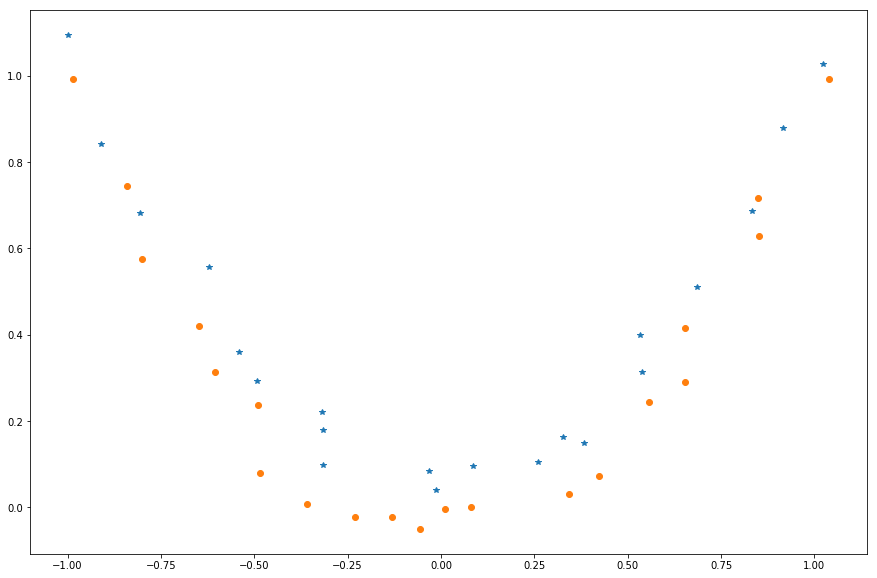

In [154]:
mat = io.loadmat("data3-2.mat")
circles = mat['circles']
stars = mat['stars']
s_pd = pd.DataFrame(stars, columns=['x', 'y'])
c_pd = pd.DataFrame(circles, columns=['x', 'y'])
s_pd['Label'] = 1
c_pd['Label'] = -1
data = pd.concat([s_pd, c_pd])
data = data.reset_index()
plt.figure(figsize=(15, 10))
plt.plot(s_pd['x'], s_pd['y'], "*")
plt.plot(c_pd['x'], c_pd['y'], "o")

In [161]:
def formulate_gaussian_kernel(h, x, x_):
  exponent = -((x[0] - x_[0])**2 + (x[1] - x_[1])**2)/(h)
  numerator = mp.e**exponent
  return numerator

def formulate_simple_kernel(x, x_):
    ans = 1 + x[0]*x_[0] + x[1]*x_[1]
    return ans**2

def compute_coefficients(data, regularizer, h=1, kernel_type="Gaussian"):
  k = np.zeros((len(data), len(data)))
  if kernel_type == "Gaussian":
    for i in range(0, len(data)):
      for j in range(0, len(data)):
        k[i][j] = formulate_gaussian_kernel(h, (data.iloc[i]['x'], data.iloc[i]['y']), \
                                          (data.iloc[j]['x'], data.iloc[j]['y']))
  elif kernel_type == "Simple":
    for i in range(0, len(data)):
      for j in range(0, len(data)):
        k[i][j] = formulate_simple_kernel((data.iloc[i]['x'], data.iloc[i]['y']), \
                                        (data.iloc[j]['x'], data.iloc[j]['y']))

  regularizer_identity = regularizer * np.identity(len(data))
  inverse = np.linalg.inv(regularizer_identity + k)
  label = np.array(data['Label']).reshape((-1, 1))
  return np.matmul(inverse, label)

def compute_gaussian_kernel(h, x_):
    x = Symbol('x', real=True)
    y = Symbol('y', real=True)
    exponent = -((x - x_[0]) ** 2 + (y - x_[1]) ** 2) / (h)
    numerator = mp.e**exponent
    return sympify(numerator)


def compute_simple_kernel(x_):
  x = Symbol('x', real=True)
  y = Symbol('y', real=True)
  ans = 1 + x * x_[0] + y * x_[1]
  return ans ** 2

def separating_boundary_function(coefficients, h=1, kernel_type="Gaussian"):
    g_x = 0
    x = Symbol('x', real=True)
    y = Symbol('y', real=True)
    if kernel_type == "Gaussian":
      for i in range(0, len(data)):
        g_x = g_x + coefficients[i] * \
              compute_gaussian_kernel(h, (data.iloc[i]['x'], data.iloc[i]['y']))
    elif kernel_type == "Simple":
      for i in range(0, len(data)):
        g_x = g_x + coefficients[i] * \
              compute_simple_kernel((data.iloc[i]['x'], data.iloc[i]['y']))
    return sympify(g_x)[0]


def plot_boundary(data, regularizer=0.1, h=1, \
                  support_x=(-1.25, 1.25), support_y=(-0.5, 1.5), kernel_type="Gaussian", margin=0.01):
    precision = 10
    a = compute_coefficients(data, regularizer, h, kernel_type)
    g_x = separating_boundary_function(a, h, kernel_type)
    x = Symbol('x', real=True)
    y = Symbol('y', real=True)
#     y_val = [solve(g_x.subs({x:(x_ / precision)})) \
#            for x_ in range(int(support_x[0] * precision), int(support_x[1] * precision), 1)]
#     x_axis = [x_ / precision \
#             for x_ in range(int(support_x[0] * precision), \
#                                            int(support_x[1] * precision), 1)]

    y_val = []
    x_axis = []
    for x_ in range(int(support_x[0]*precision), int(support_x[1]*precision), 1):
        for y_ in range(int(support_y[0]*precision), int(support_y[1]*precision), 1):
            if Abs(g_x.subs({x:x_/precision, y:y_/precision})) < margin:
                y_val.append(y_/precision)
                x_axis.append(x_/precision)
                break
                
    plt.figure(figsize=(15, 10))
    plt.plot(s_pd['x'], s_pd['y'], "*")
    plt.plot(c_pd['x'], c_pd['y'], "o")    
    plt.plot(x_axis, y_val, "-o", label="boundary")
    plt.legend()
    return g_x

[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.

TypeError: 'Add' object does not support indexing

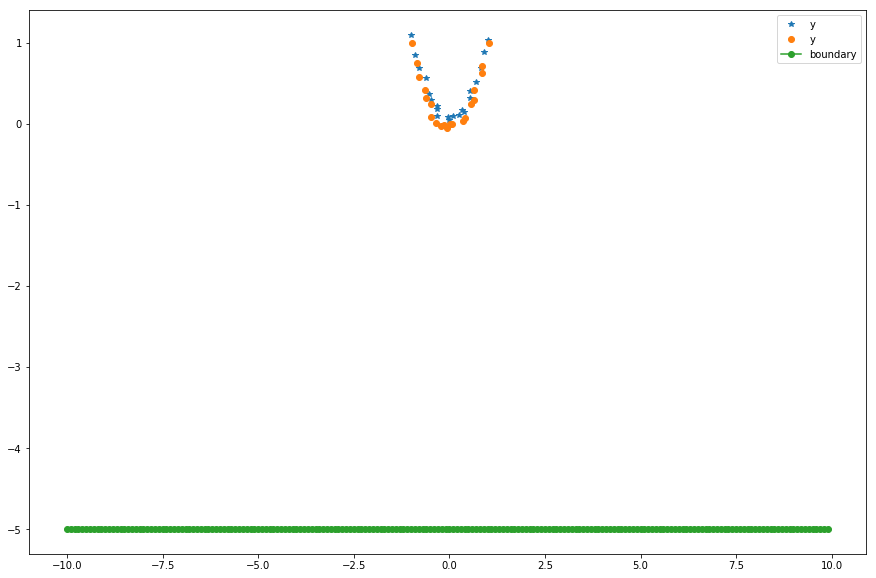

In [162]:
g_x = plot_boundary(data, support_x=(-10, 10), support_y=(-5, 5), margin=0.0001, h=0.01, regularizer=0.001)

In [164]:
x = Symbol('x')
y = Symbol('y')
g_x.subs([(x, 0.25), (y, 0)])

-7.42733727710727*2.71828182845905**(-100.0*(x - 1.03911348931484)**2 - 100.0*(y - 0.992069377706714)**2) + 7.34159305793046*2.71828182845905**(-100.0*(x - 1.02306611350864)**2 - 100.0*(y - 1.0269891222759)**2) + 1.63980841396355*2.71828182845905**(-100.0*(x - 0.916753828819499)**2 - 100.0*(y - 0.87865195299489)**2) - 7.47779086590009*2.71828182845905**(-100.0*(x - 0.851131711951232)**2 - 100.0*(y - 0.628741534930132)**2) - 13.862464957081*2.71828182845905**(-100.0*(x - 0.850155738550236)**2 - 100.0*(y - 0.71743714938783)**2) + 18.3732235698294*2.71828182845905**(-100.0*(x - 0.833134412150436)**2 - 100.0*(y - 0.686319450159334)**2) + 1.68131301700815*2.71828182845905**(-100.0*(x - 0.684871815355804)**2 - 100.0*(y - 0.511419310730718)**2) - 1.78070901261934*2.71828182845905**(-100.0*(x - 0.654060679318883)**2 - 100.0*(y - 0.416739801679347)**2) - 0.574390361751245*2.71828182845905**(-100.0*(x - 0.653188302398626)**2 - 100.0*(y - 0.291249999147871)**2) - 2.34532470515311*2.71828182845905

In [103]:
from math import e
k = np.array([[1, e**-1, e**-2, e**-3], [e**-1, 1, e**-3, e**-2], [e**-2, e**-3, 1, e**-1], \
             [e**-3, e**-2, e**-1, 1]])

In [104]:
inverse = np.linalg.inv(k + 0.01*np.identity(4))

In [105]:
coeff = np.matmul(inverse, np.array([1, 1, -1, -1]).reshape(-1, 1))

In [106]:
coeff

array([[ 0.83839368],
       [ 0.83839368],
       [-0.83839368],
       [-0.83839368]])

In [107]:
x = Symbol('x')
y = Symbol('y')
g_x = 0
g_x = coeff[0]*e**-((x-1)**2 + (y-1)**2) + coeff[1]*e**-((x-2)**2 + (y-1)**2) + \
coeff[2]*e**-((x-1)**2 + (y+1)**2) + coeff[3]*e**-((x-2)**2 + (y+1)**2)
g_x = g_x[0]
g_x

0.838393675247869*2.71828182845905**(-(x - 2)**2 - (y - 1)**2) - 0.838393675247869*2.71828182845905**(-(x - 2)**2 - (y + 1)**2) + 0.838393675247869*2.71828182845905**(-(x - 1)**2 - (y - 1)**2) - 0.838393675247869*2.71828182845905**(-(x - 1)**2 - (y + 1)**2)

In [165]:
g_x.subs({x:1, y:0})

-7.42733727710727*2.71828182845905**(-100.0*(x - 1.03911348931484)**2 - 100.0*(y - 0.992069377706714)**2) + 7.34159305793046*2.71828182845905**(-100.0*(x - 1.02306611350864)**2 - 100.0*(y - 1.0269891222759)**2) + 1.63980841396355*2.71828182845905**(-100.0*(x - 0.916753828819499)**2 - 100.0*(y - 0.87865195299489)**2) - 7.47779086590009*2.71828182845905**(-100.0*(x - 0.851131711951232)**2 - 100.0*(y - 0.628741534930132)**2) - 13.862464957081*2.71828182845905**(-100.0*(x - 0.850155738550236)**2 - 100.0*(y - 0.71743714938783)**2) + 18.3732235698294*2.71828182845905**(-100.0*(x - 0.833134412150436)**2 - 100.0*(y - 0.686319450159334)**2) + 1.68131301700815*2.71828182845905**(-100.0*(x - 0.684871815355804)**2 - 100.0*(y - 0.511419310730718)**2) - 1.78070901261934*2.71828182845905**(-100.0*(x - 0.654060679318883)**2 - 100.0*(y - 0.416739801679347)**2) - 0.574390361751245*2.71828182845905**(-100.0*(x - 0.653188302398626)**2 - 100.0*(y - 0.291249999147871)**2) - 2.34532470515311*2.71828182845905